# Regularyzacja Sieci Neuronowych

Za pomocą poniższego skryptu proszę pobrać zbiór danych - jest to zmniejszona wersja MNISTa na potrzeby ćwiczenia. Jeśli sieci uczą się zbyt wolno, można spróbować dostosować parametr `shrinkage`. Mówi on o tym, jak duża część zbioru danych jest wczytywana.

In [1]:
import torch
from utils import load_mnist, show_results, ModelTrainer

%matplotlib inline


torch.manual_seed(44)

train_dataset = load_mnist(train=True, shrinkage=0.01)
test_dataset = load_mnist(train=False, shrinkage=0.1)

Poniższy blok ustawia parametry wspólne dla wszystkich porównywanych w notebooku modeli. Powinny być one ustawione tak, aby wszystkie modele zdążyły się nauczyć zadania do granic swoich możliwości (wypłaszczenie funkcji kosztu) - zaproponowane parametry powinny być w porządku, ale modele mogą liczyć się powoli.

In [2]:
n_epochs = 500
learning_rate = 0.05
batch_size = 128

trainer = ModelTrainer(train_dataset, test_dataset, batch_size=batch_size)

W kolejnym bloku przy użyciu modułu `torch.nn.Sequential`, który tworzy sieć neuronową przez sekwencyjne łączenie podanych warstw, zbudować należy sieć neuronową z 2 warstwami ukrytymi o wielkości 256 i aktywacją ReLU między nimi. Sieć ta posłuży nam jako baseline, a w dalszej części notebooka będziemy dodawać do modelu dodatkowe warstwy i porównywać wyniki.

In [ ]:
model = torch.nn.Sequential(
    ???
)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
history = trainer.train(model, optimizer, n_epochs=n_epochs)
show_results(model=history)

Jeśli powyższy kod został uruchomiony poprawnie, sieć powinna osiągnąć około 85,5% dokładności$^*$ na zbiorze testowym. Na wykresie funkcji kosztu widać, że krzywa testowa w okolicach 100-tnej epoki$^*$ zaczyna się unosić, a dokładność przestaje rosnąć. Świadczy to o tym, że model zaczyna za bardzo dopasowywać się do danych (**overfitting**). Aby otrzymać najlepszy model dla tej architektury, należałoby wczytać parametry z momentu, gdy dokładność testowa była najwyższa (tzw. **early stopping**). W dalszej części rozważymy architektury z regularyzacjami poprawiającymi ten wynik.

$^*$ liczby dotyczą proponowanych domyślnych parametrów

### I. Regularyzacje Oparte o Funkcję Kosztu

Podstawowym sposobem regularyzacji niezwiązanym z architekturą jest dodanie do funkcji kosztu $J(\Theta;X,y)$ kary $\Omega(\Theta)$ związanej z parametrami. Kara jest regulowana przez współczynnik $\alpha \in [0, \infty)$.

\begin{equation*}
\tilde{J}(\Theta;X,y) = J(\Theta;X,y) + \alpha \Omega(\Theta)
\end{equation*}

Podstawowym wyborem przy doborze kary jest norma **L1** lub **L2** na wagach sieci. Zwykle dążymy do uproszczenia modelu, a więc zmniejszenia wariancji, dlatego **norma jest stosowana tylko na wagach, z pominięciem biasów**.

### II. Dropout

Dropout jest warstwą „wyłączającą” część neuronów, przez co model staje się bardziej odporny na overfitting.

1. Na czym dokładnie polega „wyłączanie” neuronów w fazie treningu i w fazie testu? Dla lepszego zrozumienia proszę spróbować zaimplementować własną wersję warstwy dropout i odtworzyć wynik eksperymentu.
2. Proszę wyjaśnić na czym polega regularyzacja warstwy dropout.
 - Jaka intuicja stoi za pozostawianiem tylko części cech w trakcie nauki?
 - Co można powiedzieć o krzywej dokładności na zbiorze treningowym w porównaniu do modelu baseline'owego?
 - W jaki sposób sieć z warstwą dropout można traktować jako ensemble (połączenie wielu modelów)?
 
##### Literatura
 
1. [Srivastava, Nitish, et al. "Dropout: a simple way to prevent neural networks from overfitting."](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

In [ ]:
class Dropout(torch.nn.Module):
    
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        ???

    def forward(self, x):
        if self.train():
            ???
        else:
            ???

Do modelu baseline'owego po każdej warstwie należy dodać dropout z prawdopodobieństwem zachowania neuronów równym 50%. (można eksperymentować z niestandardowymi wartościami)

In [ ]:
model = torch.nn.Sequential(
    ???
)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
dropout_history = trainer.train(model, optimizer, n_epochs=n_epochs)
show_results(model=dropout_history)

### III. Batch Normalization

Batch Normalization jest techniką redukującą **internal covariate shift** (ale czy na pewno? [[2]](https://arxiv.org/pdf/1805.11604.pdf)) poprzez normalizację wyjścia poszczególnych warstw. Wraz ze zmianą parametrów warstwy poprzedniej zmienia się domena zadania dla warstwy kolejnej. Dzięki normalizacji uczenie jest szybsze i bardziej stabilne - można użyć wyższych wartości współczynnika uczenia, normalizacja zapobiega zanikaniu i wybuchaniu gradientów.

1. Jak działa BN w fazie treningu, a jak w fazie predykcji? (Proszę podać wzory)
2. Jak BN może zapobiegać zanikającym gradientom? Proszę wytłumaczyć na przykładzie aktywacji sigmoidalnej $\sigma(x) = \frac{1}{1+e^{-x}}$.
3. Czy BN powinien być stosowany przed czy po aktywacji i dlaczego? (Wskazówka: nie ma złych odpowiedzi)
4. Czy można BN traktować jako regularyzację sieci neuronowej?

##### Literatura

1. [Ioffe, Sergey, and Christian Szegedy. "Batch normalization: Accelerating deep network training by reducing internal covariate shift."](https://arxiv.org/pdf/1502.03167.pdf)

2. [Santurkar, Shibani, et al. "How does batch normalization help optimization?(no, it is not about internal covariate shift)."](https://arxiv.org/pdf/1805.11604.pdf)

In [ ]:
class BatchNorm(torch.nn.Module):

    def forward(self, x):
        if self.train():
            ???
        else:
            ???

Do modelu baseline'owego należy dodać Batch Normalization po każdej warstwie.

In [ ]:
model = torch.nn.Sequential(
    ???
)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
bn_history = trainer.train(model, optimizer, n_epochs=n_epochs)
show_results(model=bn_history)

### Podsumowanie

Poniżej załączony oczekiwany rezultat eksperymentów dla zaproponowanych parametrów.

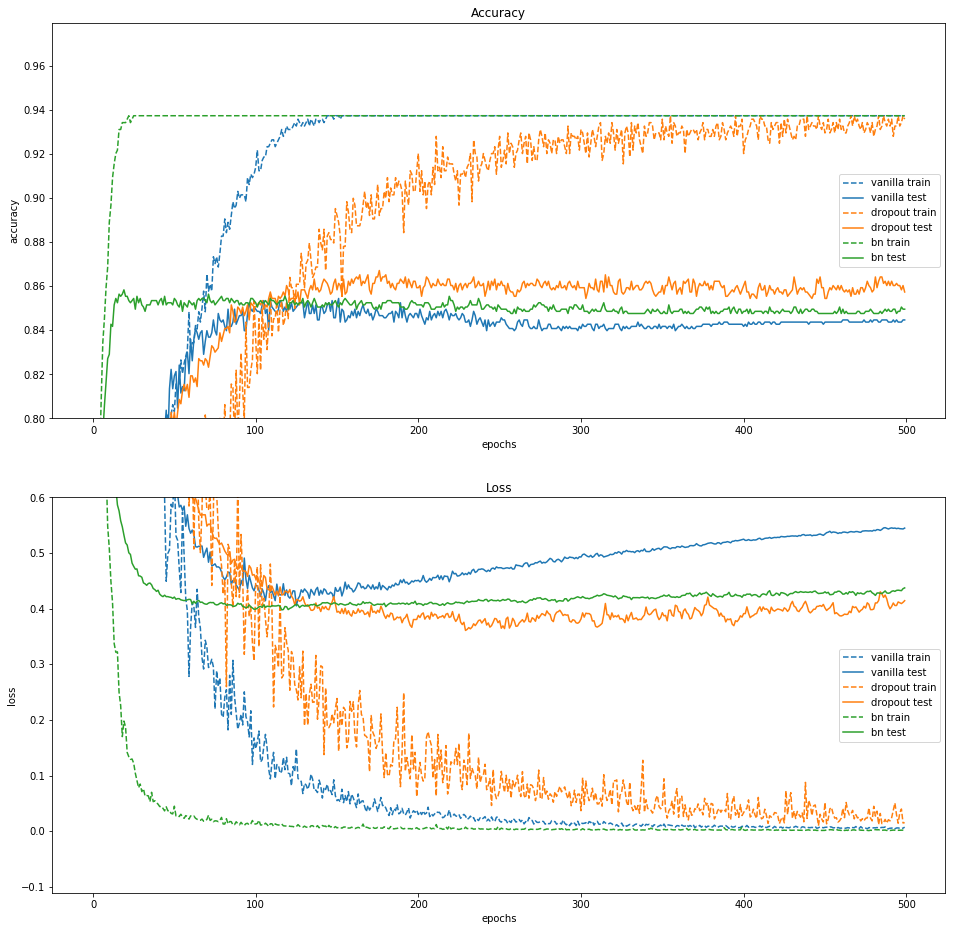

In [6]:
show_results(vanilla=history, dropout=dropout_history, bn=bn_history, 
             orientation='vertical', accuracy_bottom=0.8, loss_top=0.6)